In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

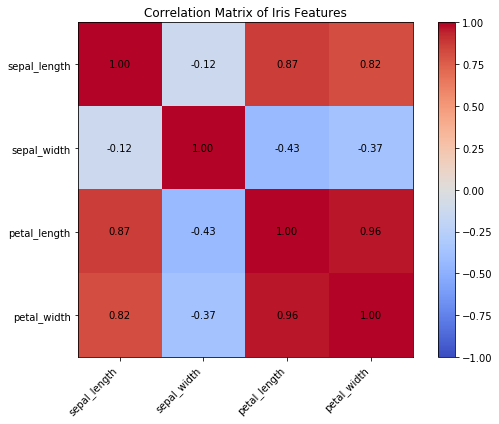

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import math
from scipy.special import perm, comb
from itertools import permutations, combinations

# 예제: 10명의 선수 중 3명을 뽑아 금, 은, 동메달을 주는 경우의 수 (순열)
n, r = 10, 3
p_manual = math.factorial(n) / math.factorial(n - r)
p_scipy = perm(n, r)
p_iter = permutations(range(n), r)

print(f"Permutation ({n}P{r}): {p_manual}") # 720.0
print(f"Permutation (scipy): {p_scipy}") # 720
print(f"Permutation (iter): {len(list(p_iter))}") # 720

# 예제: 10명의 학생 중 3명의 대표를 뽑는 경우의 수 (조합)
c_manual = math.factorial(n) / (math.factorial(r) * math.factorial(n - r))
c_scipy = comb(n, r)
c_iter = combinations(range(n), r)
print(f"\nCombination ({n}C{r}): {c_manual}") # 120.0
print(f"Combination (scipy): {c_scipy}") # 120
print(f"Combination (iter): {len(list(c_iter))}") # 120

Permutation (10P3): 720.0
Permutation (scipy): 720.0
Permutation (iter): 720

Combination (10C3): 120.0
Combination (scipy): 120.0
Combination (iter): 120


In [11]:
from itertools import permutations, combinations

len(list(permutations(range(10), 3)))

720

In [14]:
# 사전 확률 (Prior)
p_a = 0.001  # P(A): 실제로 병이 있을 확률
p_not_a = 1 - p_a # P(A'): 실제로 병이 없을 확률

# 가능도 (Likelihood)
p_b_given_a = 0.99 # P(B|A): 병이 있을 때 양성으로 진단할 확률 (민감도)
p_b_given_not_a = 0.02 # P(B|A'): 병이 없을 때 양성으로 진단할 확률 (위양성률)

# 증거 (Evidence) 계산: P(B) = P(B|A)*P(A) + P(B|A')*P(A')
# 전체 양성 판정 확률 = (실제 병이 있으면서 양성일 확률) + (실제 병이 없으면서 양성일 확률)
p_b = (p_b_given_a * p_a) + (p_b_given_not_a * p_not_a)

# 베이즈 정리를 이용한 사후 확률 (Posterior) 계산
# P(A|B) = [P(B|A) * P(A)] / P(B)
p_a_given_b = (p_b_given_a * p_a) / p_b

print(f"P(A) = {p_a:.3f} (사전 확률)")
print(f"P(B) = {p_b:.5f} (전체 양성 판정 확률)")
print(f"P(A|B) = {p_a_given_b:.3f} (사후 확률)")

P(A) = 0.001 (사전 확률)
P(B) = 0.02097 (전체 양성 판정 확률)
P(A|B) = 0.047 (사후 확률)


불량품이 정확히 2개 나올 확률: 0.1887


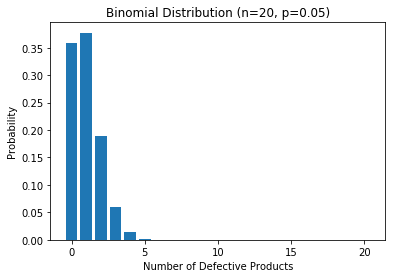

In [16]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n, p = 20, 0.05
k = 2

# P(X=k) - pmf 사용
prob = binom.pmf(k, n, p)
print(f"불량품이 정확히 {k}개 나올 확률: {prob:.4f}") # 0.1887

# 시각화
x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x, n, p))
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of Defective Products")
plt.ylabel("Probability")
plt.show()

손님이 정확히 5명 올 확률: 0.0378


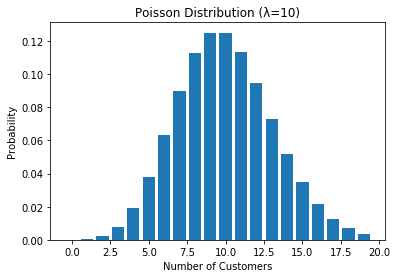

In [17]:
from scipy.stats import poisson

mu = 10 # lambda
k = 5

# P(X=k) - pmf 사용
prob = poisson.pmf(k, mu)
print(f"손님이 정확히 {k}명 올 확률: {prob:.4f}") # 0.0378

# 시각화
x = np.arange(0, 2 * mu)
plt.bar(x, poisson.pmf(x, mu))
plt.title(f"Poisson Distribution (λ={mu})")
plt.xlabel("Number of Customers")
plt.ylabel("Probability")
plt.show()

점수가 80점 이상 90점 이하일 확률: 0.1359


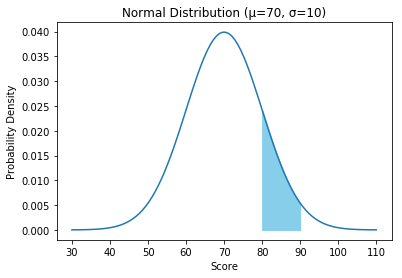

In [18]:
from scipy.stats import norm

mu, sigma = 70, 10

# P(80 <= X <= 90) = P(X <= 90) - P(X < 80)
# cdf(x)는 P(X <= x)를 계산
prob = norm.cdf(90, loc=mu, scale=sigma) - norm.cdf(80, loc=mu, scale=sigma)
print(f"점수가 80점 이상 90점 이하일 확률: {prob:.4f}") # 0.1359

# 시각화
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
plt.title(f"Normal Distribution (μ={mu}, σ={sigma})")
plt.xlabel("Score")
plt.ylabel("Probability Density")
# 확률 영역 채우기
x_fill = np.linspace(80, 90, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, loc=mu, scale=sigma), color='skyblue')
plt.show()

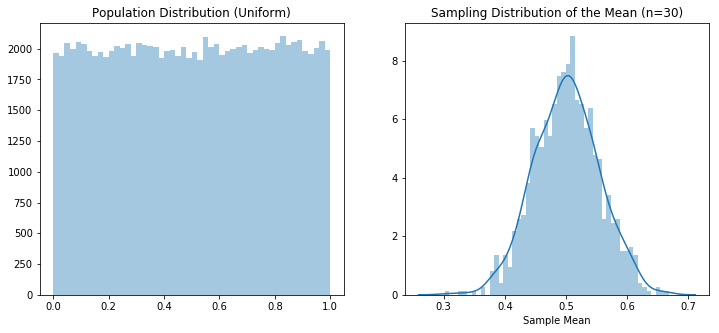

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모집단 생성: 0과 1 사이의 균등 분포 (정규분포가 아님)
population = np.random.uniform(0, 1, 100000)

# 표본 크기(n)와 시뮬레이션 횟수 설정
sample_size = 30
num_simulations = 1000

# 표본 평균들을 저장할 리스트
sample_means = []

for _ in range(num_simulations):
    # 모집단에서 표본 추출
    sample = np.random.choice(population, size=sample_size)
    # 표본의 평균 계산 및 저장
    sample_means.append(sample.mean())

# 시각화
plt.figure(figsize=(12, 5))

# 모집단 분포
plt.subplot(1, 2, 1)
sns.distplot(population, bins=50, kde=False)
plt.title('Population Distribution (Uniform)')

# 표본 평균들의 분포
plt.subplot(1, 2, 2)
sns.distplot(sample_means, bins=50, kde=True)
plt.title(f'Sampling Distribution of the Mean (n={sample_size})')
plt.xlabel('Sample Mean')

plt.show()

In [22]:
from scipy.stats import sem
import numpy as np

# 예제 데이터 (어떤 표본)
sample_data = [10, 12, 15, 13, 18, 11, 16, 14]

# 1. 수동 계산
n = len(sample_data)
sample_std = np.std(sample_data, ddof=1) # ddof=1은 표본 표준편차를 의미
standard_error_manual = sample_std / np.sqrt(n)

# 2. scipy.stats.sem 사용
standard_error_scipy = sem(sample_data)

print(f"표본 크기 (n): {n}")
print(f"표본 표준편차 (s): {sample_std:.4f}")
print(f"표준 오차 (수동 계산): {standard_error_manual:.4f}")
print(f"표준 오차 (scipy.sem): {standard_error_scipy:.4f}")

표본 크기 (n): 8
표본 표준편차 (s): 2.6693
표준 오차 (수동 계산): 0.9437
표준 오차 (scipy.sem): 0.9437
